## Validation #1: Compare GNSS data with metrics

-- To be updated in the future work --

For each test:

1. We calculate the aforementioned metrics 
2. We calculate the difference between GPS velocity (assumed as ground truth) and FT-derived velocity. 
3. We compare the ground truth deviation and the metric and determine whether there is a correlation in between. Ideally, a good metric should indicate a certain type of correlation.

### Requirements and Limits

- Availability of GNSS stations on a glacier

### Procedure

### Analysis

To be updated. Now you can only see 3 tests here without any metric values plotted on the figures.

<!-- #### 1. Information, map area, importing modules

- Test area: **Kaskawulsh Glacier**
- Test packages: **CARST and Vmap**
- Test pair: **Landsat 8 20180304** -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show as rio_show
import matplotlib as mpl
import pandas as pd
import geopandas as gpd
import numpy as np

/data/whyj/Software/anaconda3/envs/carst/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
folder = '/data/whyj/Projects/Cryosphere/PX_comparison/Yukon/PX/autorift-CARST_comparison/'

carst_f = folder + 'carst_120m.tif'
autorift_f = folder + 'autorift_120m.tif'
vmap_f = folder + 'vmap.tif'

gps_f = '/data/whyj/Projects/Cryosphere/PX_comparison/Yukon/PX/vmap_Will/Kaskawulsh_2018-08-18_to_2018-09-03'

In [4]:
ca = rasterio.open(carst_f)
au = rasterio.open(autorift_f)
vm = rasterio.open(vmap_f)

gps = pd.read_csv(gps_f) 
gps = gpd.GeoDataFrame(gps, geometry=gpd.points_from_xy(gps['end_easting'], gps['end_northing']), crs='EPSG:32607')

gps_xy = list(gps[['end_easting', 'end_northing']].to_records(index=False))
sample_gen = ca.sample(gps_xy)
ca_velo = [float(record) for record in sample_gen]
sample_gen = au.sample(gps_xy)
au_velo = [float(record) for record in sample_gen]
sample_gen = vm.sample(gps_xy)
vm_velo = [float(record) for record in sample_gen]

gps['CARST velo (m/d)'] = ca_velo
gps['autoRIFT velo (m/d)'] = au_velo
gps['vmap velo (m/d)'] = vm_velo

gps
# CHECK THE LAST 5 COLUMNS

,Unnamed: 0,date1,date2,start_easting,start_northing,end_easting,end_northing,distance_traveled (m),velocity (m/d),geometry,CARST velo (m/d),autoRIFT velo (m/d),vmap velo (m/d)
0,0,2018-08-18,2018-09-03,621368.621431,6.738902e+06,621374.193187,6.738909e+06,8.844534,0.552595,POINT (621374.193187083 6738909.285911663),0.401404,1.166352,1.101306
1,1,2018-08-18,2018-09-03,610513.759702,6.737085e+06,610521.198198,6.737080e+06,8.913480,0.557092,POINT (610521.1981979164 6737079.771637913),0.580000,0.559709,1.542311
2,2,2018-08-18,2018-09-03,NaN,NaN,601801.697365,6.733765e+06,NaN,NaN,POINT (601801.6973654167 6733764.981373749),0.329891,0.340908,0.534028


Landsat 8 Feature Tracking: 20180818-20180903


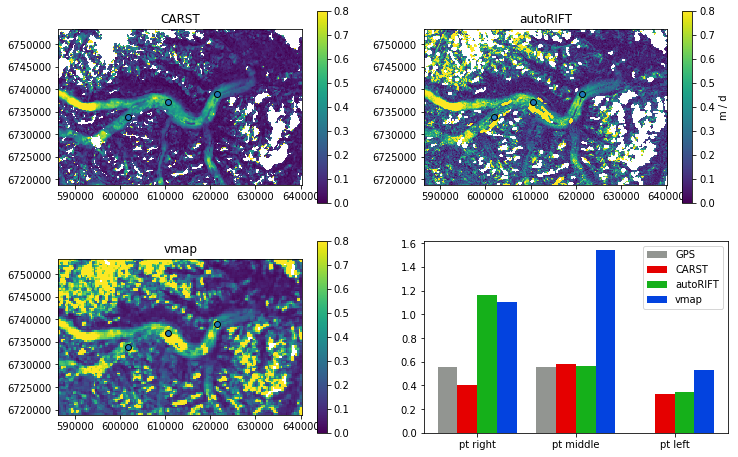

In [5]:
fig=plt.figure(figsize=(12, 12))
ax1=fig.add_subplot(321)
ax2=fig.add_subplot(322, sharex=ax1, sharey=ax1)
ax3=fig.add_subplot(323, sharex=ax1, sharey=ax1)

ax1.set_title('CARST')
ax2.set_title('autoRIFT')
ax3.set_title('vmap')

rio_show(ca, ax=ax1, vmin=0, vmax=0.8)
rio_show(au, ax=ax2, vmin=0, vmax=0.8)
rio_show(vm, ax=ax3, vmin=0, vmax=0.8)
# clim=im.properties()['clim']

gps.plot(ax=ax1, edgecolor='black')
gps.plot(ax=ax2, edgecolor='black')
gps.plot(ax=ax3, edgecolor='black')

norm = mpl.colors.Normalize(vmin=0,vmax=0.8)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# print(ax3.collections[0])
# plt.colorbar(ax3.collections[0])
# plt.colorbar(ax=ax3, cax=ax3)
fig.colorbar(sm, ax=ax1)
cent = fig.colorbar(sm, ax=ax2)
fig.colorbar(sm, ax=ax3)

cent.set_label('m / d')

ax4=fig.add_subplot(324)

x_lbl = np.array([0, 1, 2])
gps_ax4 = gps['velocity (m/d)']
ca_ax4 = gps['CARST velo (m/d)']
au_ax4 = gps['autoRIFT velo (m/d)']
vm_ax4 = gps['vmap velo (m/d)']
ax4.bar(x_lbl - 0.3, gps_ax4, color='xkcd:gray', width=0.2, label='GPS')
ax4.bar(x_lbl - 0.1, ca_ax4, color='xkcd:red', width=0.2, label='CARST')
ax4.bar(x_lbl + 0.1, au_ax4, color='xkcd:green', width=0.2, label='autoRIFT')
ax4.bar(x_lbl + 0.3, vm_ax4, color='xkcd:blue', width=0.2, label='vmap')
ax4.set_xticks(x_lbl)
ax4.set_xticklabels(['pt right', 'pt middle', 'pt left'])
ax4.legend()

print('Landsat 8 Feature Tracking: 20180818-20180903')